## **1.급락기에는 어떤 주식을 팔아야 할까?**

###   **1.1 부채비율과 유보율(02/19-03/19)**

In [355]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

**엑셀 파일 불러오기**

In [725]:
df_name = pd.read_excel('C:/Users/pc/Desktop/phw_기말.xlsx',
                    sheet_name = '급락기 수익률',
                    header = 8)
df_name

,Symbol,A005930,A000660,A051910,A207940,A068270,A035420,A005380,A006400,A035720,...,A019180,A045300,A006880,A069640,A008470,A076610,A208860,A114190,A046970,A050320
0,Symbol Name,삼성전자,SK하이닉스,LG화학,삼성바이오로직스,셀트리온,NAVER,현대차,삼성SDI,카카오,...,티에이치엔,성우테크론,신송홀딩스,한세엠케이,부스타,해성옵틱스,엔지스테크널러지,강원,우리로,아래스
1,Kind,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,...,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC
2,Item,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,...,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F
3,Item Name,수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),...,수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%)
4,Frequency,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,...,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY
5,2020-02-29 00:00:00,-7.82,-8.72,9.36,-6.17,-0.29,-2.52,-12.21,3.51,5.85,...,-17.63,-13.14,-1.2,-20.63,-11.96,6.98,-16.06,-7.26,-18.24,0
6,2020-03-19 00:00:00,-28.65,-33.33,-43.07,-27.52,-22.87,-24.01,-49.89,-45.21,-29.47,...,-56.8,-41.63,-32.48,-46.08,-45.46,-64.2,-40.65,-39.36,-26.95,0
7,NaN,삼성전자,SK하이닉스,LG화학,삼성바이오로직스,셀트리온,NAVER,현대차,삼성SDI,카카오,...,티에이치엔,성우테크론,신송홀딩스,한세엠케이,부스타,해성옵틱스,엔지스테크널러지,강원,우리로,아래스
8,NaN,NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),...,NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C)
9,NaN,6000102001,6000102001,6000102001,6000102001,6000102001,6000102001,6000102001,6000102001,6000102001,...,6000102001,6000102001,6000102001,6000102001,6000102001,6000102001,6000102001,6000102001,6000102001,6000102001


**회사명만들기**

In [449]:
df_name=df_name.dropna(axis = 1)

In [450]:
df_name

,A005930,A000660,A051910,A207940,A068270,A035420,A005380,A006400,A035720,A000270,...,A019180,A045300,A006880,A069640,A008470,A076610,A208860,A114190,A046970,A050320
0,삼성전자,SK하이닉스,LG화학,삼성바이오로직스,셀트리온,NAVER,현대차,삼성SDI,카카오,기아차,...,티에이치엔,성우테크론,신송홀딩스,한세엠케이,부스타,해성옵틱스,엔지스테크널러지,강원,우리로,아래스
1,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,...,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC
2,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,...,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F,S41000180F
3,수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),...,수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%),수익률 (1개월)(%)
4,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,...,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY
5,-7.82,-8.72,9.36,-6.17,-0.29,-2.52,-12.21,3.51,5.85,-15.11,...,-17.63,-13.14,-1.2,-20.63,-11.96,6.98,-16.06,-7.26,-18.24,0
6,-28.65,-33.33,-43.07,-27.52,-22.87,-24.01,-49.89,-45.21,-29.47,-45.4,...,-56.8,-41.63,-32.48,-46.08,-45.46,-64.2,-40.65,-39.36,-26.95,0
7,삼성전자,SK하이닉스,LG화학,삼성바이오로직스,셀트리온,NAVER,현대차,삼성SDI,카카오,기아차,...,티에이치엔,성우테크론,신송홀딩스,한세엠케이,부스타,해성옵틱스,엔지스테크널러지,강원,우리로,아래스
8,NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),...,NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C)
9,6000102001,6000102001,6000102001,6000102001,6000102001,6000102001,6000102001,6000102001,6000102001,6000102001,...,6000102001,6000102001,6000102001,6000102001,6000102001,6000102001,6000102001,6000102001,6000102001,6000102001


In [451]:
df_name = df_name.transpose()

In [452]:
df_name

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
A005930,삼성전자,SSC,S41000180F,수익률 (1개월)(%),DAILY,-7.82,-28.65,삼성전자,NF/R-IFRS(C),6000102001,...,4Q,34.12,34.12,삼성전자,NF/R-IFRS(C),6000103004,유보율(%),4Q,28302.4,28302.4
A000660,SK하이닉스,SSC,S41000180F,수익률 (1개월)(%),DAILY,-8.72,-33.33,SK하이닉스,NF/R-IFRS(C),6000102001,...,4Q,35.14,35.14,SK하이닉스,NF/R-IFRS(C),6000103004,유보율(%),4Q,1278.94,1278.94
A051910,LG화학,SSC,S41000180F,수익률 (1개월)(%),DAILY,9.36,-43.07,LG화학,NF/R-IFRS(C),6000102001,...,4Q,95.73,95.73,LG화학,NF/R-IFRS(C),6000103004,유보율(%),4Q,4335.27,4335.27
A207940,삼성바이오로직스,SSC,S41000180F,수익률 (1개월)(%),DAILY,-6.17,-27.52,삼성바이오로직스,NF/R-IFRS(C),6000102001,...,4Q,35.76,35.76,삼성바이오로직스,NF/R-IFRS(C),6000103004,유보율(%),4Q,2532.48,2532.48
A068270,셀트리온,SSC,S41000180F,수익률 (1개월)(%),DAILY,-0.29,-22.87,셀트리온,NF/R-IFRS(C),6000102001,...,4Q,33.94,33.94,셀트리온,NF/R-IFRS(C),6000103004,유보율(%),4Q,2215.15,2215.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A076610,해성옵틱스,SSC,S41000180F,수익률 (1개월)(%),DAILY,6.98,-64.2,해성옵틱스,NF/R-IFRS(C),6000102001,...,4Q,206.78,206.78,해성옵틱스,NF/R-IFRS(C),6000103004,유보율(%),4Q,296.03,296.03
A208860,엔지스테크널러지,SSC,S41000180F,수익률 (1개월)(%),DAILY,-16.06,-40.65,엔지스테크널러지,NF/R-IFRS(C),6000102001,...,4Q,232.19,232.19,엔지스테크널러지,NF/R-IFRS(C),6000103004,유보율(%),4Q,90.96,90.96
A114190,강원,SSC,S41000180F,수익률 (1개월)(%),DAILY,-7.26,-39.36,강원,NF/R-IFRS(C),6000102001,...,4Q,167.94,167.94,강원,NF/R-IFRS(C),6000103004,유보율(%),4Q,142.2,142.2
A046970,우리로,SSC,S41000180F,수익률 (1개월)(%),DAILY,-18.24,-26.95,우리로,NF/R-IFRS(C),6000102001,...,4Q,181.66,181.66,우리로,NF/R-IFRS(C),6000103004,유보율(%),4Q,135.7,135.7


In [453]:
df_company = df_name.drop(df_name.columns[1:],axis = 1)

In [454]:
df_company

,0
A005930,삼성전자
A000660,SK하이닉스
A051910,LG화학
A207940,삼성바이오로직스
A068270,셀트리온
...,...
A076610,해성옵틱스
A208860,엔지스테크널러지
A114190,강원
A046970,우리로


In [455]:
df_company = df_company.reset_index()

In [456]:
df_company

,index,0
0,A005930,삼성전자
1,A000660,SK하이닉스
2,A051910,LG화학
3,A207940,삼성바이오로직스
4,A068270,셀트리온
...,...,...
1879,A076610,해성옵틱스
1880,A208860,엔지스테크널러지
1881,A114190,강원
1882,A046970,우리로


In [457]:
df_company.drop(df_company.columns[0],axis = 1,inplace=True)

In [458]:
df_company

,0
0,삼성전자
1,SK하이닉스
2,LG화학
3,삼성바이오로직스
4,셀트리온
...,...
1879,해성옵틱스
1880,엔지스테크널러지
1881,강원
1882,우리로


In [459]:
df_company.rename(columns = {0 : 'COMPANY'},inplace = True)

In [460]:
df_company

,COMPANY
0,삼성전자
1,SK하이닉스
2,LG화학
3,삼성바이오로직스
4,셀트리온
...,...
1879,해성옵틱스
1880,엔지스테크널러지
1881,강원
1882,우리로


**부채비율만들기**

In [467]:
df_name

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
A005930,삼성전자,SSC,S41000180F,수익률 (1개월)(%),DAILY,-7.82,-28.65,삼성전자,NF/R-IFRS(C),6000102001,...,4Q,34.12,34.12,삼성전자,NF/R-IFRS(C),6000103004,유보율(%),4Q,28302.4,28302.4
A000660,SK하이닉스,SSC,S41000180F,수익률 (1개월)(%),DAILY,-8.72,-33.33,SK하이닉스,NF/R-IFRS(C),6000102001,...,4Q,35.14,35.14,SK하이닉스,NF/R-IFRS(C),6000103004,유보율(%),4Q,1278.94,1278.94
A051910,LG화학,SSC,S41000180F,수익률 (1개월)(%),DAILY,9.36,-43.07,LG화학,NF/R-IFRS(C),6000102001,...,4Q,95.73,95.73,LG화학,NF/R-IFRS(C),6000103004,유보율(%),4Q,4335.27,4335.27
A207940,삼성바이오로직스,SSC,S41000180F,수익률 (1개월)(%),DAILY,-6.17,-27.52,삼성바이오로직스,NF/R-IFRS(C),6000102001,...,4Q,35.76,35.76,삼성바이오로직스,NF/R-IFRS(C),6000103004,유보율(%),4Q,2532.48,2532.48
A068270,셀트리온,SSC,S41000180F,수익률 (1개월)(%),DAILY,-0.29,-22.87,셀트리온,NF/R-IFRS(C),6000102001,...,4Q,33.94,33.94,셀트리온,NF/R-IFRS(C),6000103004,유보율(%),4Q,2215.15,2215.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A076610,해성옵틱스,SSC,S41000180F,수익률 (1개월)(%),DAILY,6.98,-64.2,해성옵틱스,NF/R-IFRS(C),6000102001,...,4Q,206.78,206.78,해성옵틱스,NF/R-IFRS(C),6000103004,유보율(%),4Q,296.03,296.03
A208860,엔지스테크널러지,SSC,S41000180F,수익률 (1개월)(%),DAILY,-16.06,-40.65,엔지스테크널러지,NF/R-IFRS(C),6000102001,...,4Q,232.19,232.19,엔지스테크널러지,NF/R-IFRS(C),6000103004,유보율(%),4Q,90.96,90.96
A114190,강원,SSC,S41000180F,수익률 (1개월)(%),DAILY,-7.26,-39.36,강원,NF/R-IFRS(C),6000102001,...,4Q,167.94,167.94,강원,NF/R-IFRS(C),6000103004,유보율(%),4Q,142.2,142.2
A046970,우리로,SSC,S41000180F,수익률 (1개월)(%),DAILY,-18.24,-26.95,우리로,NF/R-IFRS(C),6000102001,...,4Q,181.66,181.66,우리로,NF/R-IFRS(C),6000103004,유보율(%),4Q,135.7,135.7


In [468]:
df_debt = df_name.drop(df_name.columns[:13],axis = 1)

In [469]:
df_debt

,13,14,15,16,17,18,19,20
A005930,34.12,삼성전자,NF/R-IFRS(C),6000103004,유보율(%),4Q,28302.4,28302.4
A000660,35.14,SK하이닉스,NF/R-IFRS(C),6000103004,유보율(%),4Q,1278.94,1278.94
A051910,95.73,LG화학,NF/R-IFRS(C),6000103004,유보율(%),4Q,4335.27,4335.27
A207940,35.76,삼성바이오로직스,NF/R-IFRS(C),6000103004,유보율(%),4Q,2532.48,2532.48
A068270,33.94,셀트리온,NF/R-IFRS(C),6000103004,유보율(%),4Q,2215.15,2215.15
...,...,...,...,...,...,...,...,...
A076610,206.78,해성옵틱스,NF/R-IFRS(C),6000103004,유보율(%),4Q,296.03,296.03
A208860,232.19,엔지스테크널러지,NF/R-IFRS(C),6000103004,유보율(%),4Q,90.96,90.96
A114190,167.94,강원,NF/R-IFRS(C),6000103004,유보율(%),4Q,142.2,142.2
A046970,181.66,우리로,NF/R-IFRS(C),6000103004,유보율(%),4Q,135.7,135.7


In [475]:
df_debt.drop(df_debt.columns[1:],axis = 1,inplace = True)

In [476]:
df_debt

,13
A005930,34.12
A000660,35.14
A051910,95.73
A207940,35.76
A068270,33.94
...,...
A076610,206.78
A208860,232.19
A114190,167.94
A046970,181.66


In [477]:
df_debt=df_debt.reset_index()

In [478]:
df_debt

,index,13
0,A005930,34.12
1,A000660,35.14
2,A051910,95.73
3,A207940,35.76
4,A068270,33.94
...,...,...
1879,A076610,206.78
1880,A208860,232.19
1881,A114190,167.94
1882,A046970,181.66


In [479]:
df_debt.drop(df_debt.columns[0],axis =1,inplace = True)

In [480]:
df_debt

,13
0,34.12
1,35.14
2,95.73
3,35.76
4,33.94
...,...
1879,206.78
1880,232.19
1881,167.94
1882,181.66


In [481]:
df_debt.rename(columns = {13 : 'DEBT'},inplace = True)

In [482]:
df_debt

,DEBT
0,34.12
1,35.14
2,95.73
3,35.76
4,33.94
...,...
1879,206.78
1880,232.19
1881,167.94
1882,181.66


**급락기간 주가 수익률 가져오기**

In [483]:
df_name

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
A005930,삼성전자,SSC,S41000180F,수익률 (1개월)(%),DAILY,-7.82,-28.65,삼성전자,NF/R-IFRS(C),6000102001,...,4Q,34.12,34.12,삼성전자,NF/R-IFRS(C),6000103004,유보율(%),4Q,28302.4,28302.4
A000660,SK하이닉스,SSC,S41000180F,수익률 (1개월)(%),DAILY,-8.72,-33.33,SK하이닉스,NF/R-IFRS(C),6000102001,...,4Q,35.14,35.14,SK하이닉스,NF/R-IFRS(C),6000103004,유보율(%),4Q,1278.94,1278.94
A051910,LG화학,SSC,S41000180F,수익률 (1개월)(%),DAILY,9.36,-43.07,LG화학,NF/R-IFRS(C),6000102001,...,4Q,95.73,95.73,LG화학,NF/R-IFRS(C),6000103004,유보율(%),4Q,4335.27,4335.27
A207940,삼성바이오로직스,SSC,S41000180F,수익률 (1개월)(%),DAILY,-6.17,-27.52,삼성바이오로직스,NF/R-IFRS(C),6000102001,...,4Q,35.76,35.76,삼성바이오로직스,NF/R-IFRS(C),6000103004,유보율(%),4Q,2532.48,2532.48
A068270,셀트리온,SSC,S41000180F,수익률 (1개월)(%),DAILY,-0.29,-22.87,셀트리온,NF/R-IFRS(C),6000102001,...,4Q,33.94,33.94,셀트리온,NF/R-IFRS(C),6000103004,유보율(%),4Q,2215.15,2215.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A076610,해성옵틱스,SSC,S41000180F,수익률 (1개월)(%),DAILY,6.98,-64.2,해성옵틱스,NF/R-IFRS(C),6000102001,...,4Q,206.78,206.78,해성옵틱스,NF/R-IFRS(C),6000103004,유보율(%),4Q,296.03,296.03
A208860,엔지스테크널러지,SSC,S41000180F,수익률 (1개월)(%),DAILY,-16.06,-40.65,엔지스테크널러지,NF/R-IFRS(C),6000102001,...,4Q,232.19,232.19,엔지스테크널러지,NF/R-IFRS(C),6000103004,유보율(%),4Q,90.96,90.96
A114190,강원,SSC,S41000180F,수익률 (1개월)(%),DAILY,-7.26,-39.36,강원,NF/R-IFRS(C),6000102001,...,4Q,167.94,167.94,강원,NF/R-IFRS(C),6000103004,유보율(%),4Q,142.2,142.2
A046970,우리로,SSC,S41000180F,수익률 (1개월)(%),DAILY,-18.24,-26.95,우리로,NF/R-IFRS(C),6000102001,...,4Q,181.66,181.66,우리로,NF/R-IFRS(C),6000103004,유보율(%),4Q,135.7,135.7


In [484]:
df_return_d= df_name.drop(df_name.columns[0:6],axis = 1)

In [485]:
df_return_d

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
A005930,-28.65,삼성전자,NF/R-IFRS(C),6000102001,부채비율(%),4Q,34.12,34.12,삼성전자,NF/R-IFRS(C),6000103004,유보율(%),4Q,28302.4,28302.4
A000660,-33.33,SK하이닉스,NF/R-IFRS(C),6000102001,부채비율(%),4Q,35.14,35.14,SK하이닉스,NF/R-IFRS(C),6000103004,유보율(%),4Q,1278.94,1278.94
A051910,-43.07,LG화학,NF/R-IFRS(C),6000102001,부채비율(%),4Q,95.73,95.73,LG화학,NF/R-IFRS(C),6000103004,유보율(%),4Q,4335.27,4335.27
A207940,-27.52,삼성바이오로직스,NF/R-IFRS(C),6000102001,부채비율(%),4Q,35.76,35.76,삼성바이오로직스,NF/R-IFRS(C),6000103004,유보율(%),4Q,2532.48,2532.48
A068270,-22.87,셀트리온,NF/R-IFRS(C),6000102001,부채비율(%),4Q,33.94,33.94,셀트리온,NF/R-IFRS(C),6000103004,유보율(%),4Q,2215.15,2215.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A076610,-64.2,해성옵틱스,NF/R-IFRS(C),6000102001,부채비율(%),4Q,206.78,206.78,해성옵틱스,NF/R-IFRS(C),6000103004,유보율(%),4Q,296.03,296.03
A208860,-40.65,엔지스테크널러지,NF/R-IFRS(C),6000102001,부채비율(%),4Q,232.19,232.19,엔지스테크널러지,NF/R-IFRS(C),6000103004,유보율(%),4Q,90.96,90.96
A114190,-39.36,강원,NF/R-IFRS(C),6000102001,부채비율(%),4Q,167.94,167.94,강원,NF/R-IFRS(C),6000103004,유보율(%),4Q,142.2,142.2
A046970,-26.95,우리로,NF/R-IFRS(C),6000102001,부채비율(%),4Q,181.66,181.66,우리로,NF/R-IFRS(C),6000103004,유보율(%),4Q,135.7,135.7


In [486]:
df_return_d.drop(df_return_d.columns[1:],axis=1,inplace = True)

In [487]:
df_return_d

,6
A005930,-28.65
A000660,-33.33
A051910,-43.07
A207940,-27.52
A068270,-22.87
...,...
A076610,-64.2
A208860,-40.65
A114190,-39.36
A046970,-26.95


In [488]:
df_return_d=df_return_d.reset_index()

In [489]:
df_return_d

,index,6
0,A005930,-28.65
1,A000660,-33.33
2,A051910,-43.07
3,A207940,-27.52
4,A068270,-22.87
...,...,...
1879,A076610,-64.2
1880,A208860,-40.65
1881,A114190,-39.36
1882,A046970,-26.95


In [490]:
df_return_d.drop(df_return_d.columns[0],axis =1,inplace = True)

In [491]:
df_return_d

,6
0,-28.65
1,-33.33
2,-43.07
3,-27.52
4,-22.87
...,...
1879,-64.2
1880,-40.65
1881,-39.36
1882,-26.95


In [492]:
df_return_d.rename(columns = {6 : 'RETURN'},inplace = True)

In [493]:
df_return_d

,RETURN
0,-28.65
1,-33.33
2,-43.07
3,-27.52
4,-22.87
...,...
1879,-64.2
1880,-40.65
1881,-39.36
1882,-26.95


**유보율을 가지고 온다**

In [494]:
df_name

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
A005930,삼성전자,SSC,S41000180F,수익률 (1개월)(%),DAILY,-7.82,-28.65,삼성전자,NF/R-IFRS(C),6000102001,...,4Q,34.12,34.12,삼성전자,NF/R-IFRS(C),6000103004,유보율(%),4Q,28302.4,28302.4
A000660,SK하이닉스,SSC,S41000180F,수익률 (1개월)(%),DAILY,-8.72,-33.33,SK하이닉스,NF/R-IFRS(C),6000102001,...,4Q,35.14,35.14,SK하이닉스,NF/R-IFRS(C),6000103004,유보율(%),4Q,1278.94,1278.94
A051910,LG화학,SSC,S41000180F,수익률 (1개월)(%),DAILY,9.36,-43.07,LG화학,NF/R-IFRS(C),6000102001,...,4Q,95.73,95.73,LG화학,NF/R-IFRS(C),6000103004,유보율(%),4Q,4335.27,4335.27
A207940,삼성바이오로직스,SSC,S41000180F,수익률 (1개월)(%),DAILY,-6.17,-27.52,삼성바이오로직스,NF/R-IFRS(C),6000102001,...,4Q,35.76,35.76,삼성바이오로직스,NF/R-IFRS(C),6000103004,유보율(%),4Q,2532.48,2532.48
A068270,셀트리온,SSC,S41000180F,수익률 (1개월)(%),DAILY,-0.29,-22.87,셀트리온,NF/R-IFRS(C),6000102001,...,4Q,33.94,33.94,셀트리온,NF/R-IFRS(C),6000103004,유보율(%),4Q,2215.15,2215.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A076610,해성옵틱스,SSC,S41000180F,수익률 (1개월)(%),DAILY,6.98,-64.2,해성옵틱스,NF/R-IFRS(C),6000102001,...,4Q,206.78,206.78,해성옵틱스,NF/R-IFRS(C),6000103004,유보율(%),4Q,296.03,296.03
A208860,엔지스테크널러지,SSC,S41000180F,수익률 (1개월)(%),DAILY,-16.06,-40.65,엔지스테크널러지,NF/R-IFRS(C),6000102001,...,4Q,232.19,232.19,엔지스테크널러지,NF/R-IFRS(C),6000103004,유보율(%),4Q,90.96,90.96
A114190,강원,SSC,S41000180F,수익률 (1개월)(%),DAILY,-7.26,-39.36,강원,NF/R-IFRS(C),6000102001,...,4Q,167.94,167.94,강원,NF/R-IFRS(C),6000103004,유보율(%),4Q,142.2,142.2
A046970,우리로,SSC,S41000180F,수익률 (1개월)(%),DAILY,-18.24,-26.95,우리로,NF/R-IFRS(C),6000102001,...,4Q,181.66,181.66,우리로,NF/R-IFRS(C),6000103004,유보율(%),4Q,135.7,135.7


In [498]:
df_reserv=df_name.drop(df_name.columns[:20],axis=1)

In [499]:
df_reserv

,20
A005930,28302.4
A000660,1278.94
A051910,4335.27
A207940,2532.48
A068270,2215.15
...,...
A076610,296.03
A208860,90.96
A114190,142.2
A046970,135.7


In [500]:
df_reserv=df_reserv.reset_index()

In [501]:
df_reserv

,index,20
0,A005930,28302.4
1,A000660,1278.94
2,A051910,4335.27
3,A207940,2532.48
4,A068270,2215.15
...,...,...
1879,A076610,296.03
1880,A208860,90.96
1881,A114190,142.2
1882,A046970,135.7


In [503]:
df_reserv.drop(df_reserv.columns[0],axis = 1,inplace = True)

In [506]:
df_reserv.rename(columns = {20 : 'RESERV'},inplace = True)

In [507]:
df_reserv

,RESERV
0,28302.4
1,1278.94
2,4335.27
3,2532.48
4,2215.15
...,...
1879,296.03
1880,90.96
1881,142.2
1882,135.7


**네 가지의 데이터프레임을 합쳐서 회귀분석을 한다.**

In [517]:
DF_RRE = pd.concat([df_company,df_return_d,df_debt,df_reserv],axis = 1)

In [518]:
DF_RRE

,COMPANY,RETURN,DEBT,RESERV
0,삼성전자,-28.65,34.12,28302.4
1,SK하이닉스,-33.33,35.14,1278.94
2,LG화학,-43.07,95.73,4335.27
3,삼성바이오로직스,-27.52,35.76,2532.48
4,셀트리온,-22.87,33.94,2215.15
...,...,...,...,...
1879,해성옵틱스,-64.2,206.78,296.03
1880,엔지스테크널러지,-40.65,232.19,90.96
1881,강원,-39.36,167.94,142.2
1882,우리로,-26.95,181.66,135.7


In [519]:
DF_RRE=DF_RRE.set_index('COMPANY')

In [297]:
#df_return_debt=df_return_debt.dropna(axis = 0)

In [520]:
DF_RRE['RETURN'] = pd.to_numeric(DF_RRE['RETURN'])

In [521]:
DF_RRE['DEBT'] = pd.to_numeric(DF_RRE['DEBT'])

In [522]:
DF_RRE['RESERV'] = pd.to_numeric(DF_RRE['RESERV'])

In [523]:
DF_RRE.dtypes

RETURN    float64
DEBT      float64
RESERV    float64
dtype: object

In [524]:
DF_RRE

,RETURN,DEBT,RESERV
COMPANY,,,
삼성전자,-28.65,34.12,28302.40
SK하이닉스,-33.33,35.14,1278.94
LG화학,-43.07,95.73,4335.27
삼성바이오로직스,-27.52,35.76,2532.48
셀트리온,-22.87,33.94,2215.15
...,...,...,...
해성옵틱스,-64.20,206.78,296.03
엔지스테크널러지,-40.65,232.19,90.96
강원,-39.36,167.94,142.20


**결정 계수를 높이기 위해 다중회귀분석을 실시**

In [526]:
x_data = DF_RRE[['DEBT','RESERV']]

In [527]:
target = DF_RRE[['RETURN']]

In [528]:
x_data_con = sm.add_constant(x_data,has_constant = 'add')
multi_model = sm.OLS(target,x_data_con)
fitted_multi_model = multi_model.fit()

In [529]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RETURN   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.121
Date:                Sun, 13 Dec 2020   Prob (F-statistic):             0.0443
Time:                        21:10:05   Log-Likelihood:                -8058.2
No. Observations:                1884   AIC:                         1.612e+04
Df Residuals:                    1881   BIC:                         1.614e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.2444      0.486    -82.755      0.000     -41.198     -39.291
DEBT          -0.0006      0.002     -0.249      0.804      -0.005       0.004
RESERV      1.283e-05   5.17e-06      2.482      0.013    2.69e-06     2.3e-05
==============================================================================
Omnibus:                     1175.941   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21161.462
Skew:                           2.613   Prob(JB):                         0.00
Kurtosis:                      18.565   Cond. No.                     9.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**debt변수를 버리기로 한다. debt는 유의 확률이 너무 높았다.**

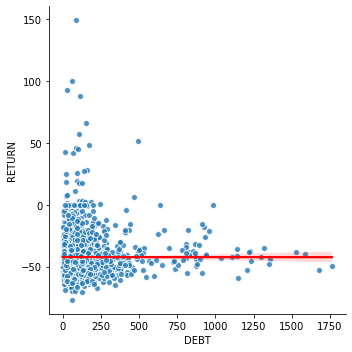

In [530]:
sns.lmplot(x="DEBT", y="RETURN", data=DF_RRE,robust = True,line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)

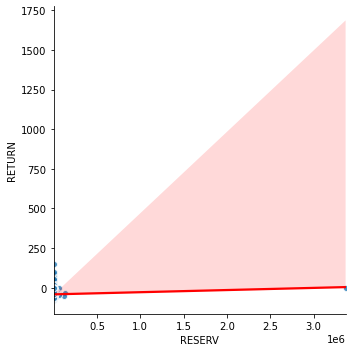

In [537]:
sns.lmplot(x="RESERV", y="RETURN", data=DF_RRE,robust = True,line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)

**유보율은 하나의 그래프로 나타내기도 너무힘들다**

**하여 그룹핑을 하여 다시 회귀분석을 하고 회귀그래프를 작성해보기로 한다.**

In [538]:
DF_RRE = DF_RRE.sort_values(by = ['RETURN'],axis=0,ascending = False)
DF_RRE

,RETURN,DEBT,RESERV
COMPANY,,,
수젠텍,149.25,86.76,276.08
랩지노믹스,100.46,62.66,511.07
씨젠,92.55,28.06,1148.43
진원생명과학,88.35,112.60,20.55
엑세스바이오,66.23,149.93,1404.64
...,...,...,...
국일신동,-69.29,12.74,753.71
엠투엔,-69.58,64.08,508.51
유양디앤유,-69.65,79.11,297.01


In [566]:
DF_RRE_1 = DF_RRE.iloc[:93,:]
DF_RRE_2 = DF_RRE.iloc[94:188,:]
DF_RRE_3 = DF_RRE.iloc[189:283,:]
DF_RRE_4 = DF_RRE.iloc[284:378,:]
DF_RRE_5 = DF_RRE.iloc[379:473,:]
DF_RRE_6= DF_RRE.iloc[474:568,:]
DF_RRE_7= DF_RRE.iloc[569:663,:]
DF_RRE_8= DF_RRE.iloc[664:758,:]
DF_RRE_9= DF_RRE.iloc[759:853,:]
DF_RRE_10= DF_RRE.iloc[854:948,:]
DF_RRE_11= DF_RRE.iloc[949:1043,:]
DF_RRE_12= DF_RRE.iloc[1044:1138,:]
DF_RRE_13= DF_RRE.iloc[1139:1233,:]
DF_RRE_14= DF_RRE.iloc[1234:1328,:]
DF_RRE_15= DF_RRE.iloc[1329:1423,:]
DF_RRE_16= DF_RRE.iloc[1424:1518,:]
DF_RRE_17= DF_RRE.iloc[1519:1613,:]
DF_RRE_18= DF_RRE.iloc[1614:1708,:]
DF_RRE_19= DF_RRE.iloc[1709:1803,:]
DF_RRE_20= DF_RRE.iloc[1804:,:]


In [567]:
df_group = (DF_RRE_1,DF_RRE_2,DF_RRE_3,DF_RRE_4,DF_RRE_5,DF_RRE_6,DF_RRE_7,DF_RRE_8,DF_RRE_9,DF_RRE_10,DF_RRE_11,DF_RRE_12,DF_RRE_13,DF_RRE_14,DF_RRE_15,DF_RRE_16,DF_RRE_17,DF_RRE_18,DF_RRE_19,DF_RRE_20)
group=[]
for df in df_group:
    mean_DF_RRE = df.mean()
    data = [[mean_DF_RRE['RETURN'],mean_DF_RRE['DEBT'],mean_DF_RRE['RESERV']]]
    df_group_done = pd.DataFrame(data,columns = ['RETURN','DEBT','RESERV'])
    group.append(df_group_done)

**코드를 이용해 데이터 다시 쉽게 
합치기**

In [568]:
data = group[0]
for i in range(1,20):
    data1=pd.concat([data,group[i]],axis = 0)
    data=data1

In [569]:
DF_RRE_GP=data

In [578]:
reg = sm.OLS.from_formula("RETURN ~ RESERV", DF_RRE_GP).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RETURN   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     22.99
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           0.000145
Time:                        21:56:57   Log-Likelihood:                -76.250
No. Observations:                  20   AIC:                             156.5
Df Residuals:                      18   BIC:                             158.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.5143      2.880    -16.153      0.000     -52.564     -40.464
RESERV         0.0016      0.000      4.794      0.000       0.001       0.002
==============================================================================
Omnibus:                        2.572   Durbin-Watson:                   0.475
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.370
Skew:                           0.633   Prob(JB):                        0.504
Kurtosis:                       3.197   Cond. No.                     9.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**조건수’란 독립변수의 함수식에서 (여기서는 회귀식을 말한다) 변수의 변화에 따른 함수의 변동성을 의미하는데 조건수가 높을수록 그 모형은 불완전한 모형이 된다. 조건수가 크게 되면 회귀식의 계수와 유의확률이 왜곡되게 나오므로 조건수를 낮춰야 한다.**
**조건수’를 낮추는 방법은 데이터를 스케일링하면 된다. 원래 데이터 스케일링은 다차원의 비교분석하기 쉽게 만들어주는 방법인데 여기에 조건수를 낮추기 위해 적용해 주기로 한다.**

In [579]:
reg = sm.OLS.from_formula("RETURN ~ scale(RESERV)", DF_RRE_GP).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RETURN   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     22.99
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           0.000145
Time:                        21:57:40   Log-Likelihood:                -76.250
No. Observations:                  20   AIC:                             156.5
Df Residuals:                      18   BIC:                             158.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -40.3963      2.581    -15.648      0.000     -45.820     -34.973
scale(RESERV)    12.3768      2.581      4.794      0.000       6.953      17.800
==============================================================================
Omnibus:                        2.572   Durbin-Watson:                   0.475
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.370
Skew:                           0.633   Prob(JB):                        0.504
Kurtosis:                       3.197   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **2.회복기에는 어떤 주식을 사야 할까?**

###   **2.1 전분기 자본금 대비 영업이익 & 떨어진 기간동안 기관의 매수량(03/20-06/19)**

In [659]:
df_name2 = pd.read_excel('C:/Users/pc/Desktop/phw_기말.xlsx',
                    sheet_name = '회복기_수익률',
                    header = 8)
df_name2

,Symbol,A005930,A000660,A051910,A207940,A068270,A035420,A005380,A006400,A035720,...,A019180,A045300,A006880,A069640,A008470,A076610,A208860,A114190,A046970,A050320
0,Symbol Name,삼성전자,SK하이닉스,LG화학,삼성바이오로직스,셀트리온,NAVER,현대차,삼성SDI,카카오,...,티에이치엔,성우테크론,신송홀딩스,한세엠케이,부스타,해성옵틱스,엔지스테크널러지,강원,우리로,아래스
1,Kind,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,...,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC
2,Item,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,...,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F
3,Item Name,수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),...,수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%)
4,Frequency,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,...,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY
5,2020-03-31 00:00:00,-14.43,-11.48,-3.94,11.32,26.52,-8.85,-26.39,1.91,1.3,...,-35.38,-35.27,-17.59,-42.86,-31.1,-49.02,-39.42,-23.23,-32.35,0
6,2020-06-19 00:00:00,23.17,23.77,122.61,118.85,108.21,73.26,51.75,110.38,96.64,...,53.35,53.59,53.71,50.13,41.6,84.78,130.19,25.31,10.03,0
7,NaN,삼성전자,SK하이닉스,LG화학,삼성바이오로직스,셀트리온,NAVER,현대차,삼성SDI,카카오,...,티에이치엔,성우테크론,신송홀딩스,한세엠케이,부스타,해성옵틱스,엔지스테크널러지,강원,우리로,아래스
8,NaN,NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),...,NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C)
9,NaN,6000307001,6000307001,6000307001,6000307001,6000307001,6000307001,6000307001,6000307001,6000307001,...,6000307001,6000307001,6000307001,6000307001,6000307001,6000307001,6000307001,6000307001,6000307001,6000307001


In [660]:
df_name2=df_name2.dropna(axis = 1)

In [661]:
df_name2

,A005930,A000660,A051910,A207940,A068270,A035420,A005380,A006400,A035720,A000270,...,A046070,A049120,A227610,A123700,A011080,A007120,A900260,A090150,A065770,A008110
0,삼성전자,SK하이닉스,LG화학,삼성바이오로직스,셀트리온,NAVER,현대차,삼성SDI,카카오,기아차,...,코다코,파인디앤씨,아우딘퓨쳐스,SJM,형지I&C,미래아이앤지,로스웰,광진윈텍,CS,대동전자
1,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,...,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC
2,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,...,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F,S41000190F
3,수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),...,수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%),수익률 (3개월)(%)
4,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,...,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY
5,-14.43,-11.48,-3.94,11.32,26.52,-8.85,-26.39,1.91,1.3,-41.31,...,0,-37.91,-39.54,-44.53,-33.67,8.92,-32.76,-35.26,-37,-15.6
6,23.17,23.77,122.61,118.85,108.21,73.26,51.75,110.38,96.64,46.56,...,-14.44,129.87,70.43,57.27,34.16,58.67,57.43,54.1,73.93,44.73
7,삼성전자,SK하이닉스,LG화학,삼성바이오로직스,셀트리온,NAVER,현대차,삼성SDI,카카오,기아차,...,코다코,파인디앤씨,아우딘퓨쳐스,SJM,형지I&C,미래아이앤지,로스웰,광진윈텍,CS,대동전자
8,NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),...,NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C),NF/R-IFRS(C)
9,6000307001,6000307001,6000307001,6000307001,6000307001,6000307001,6000307001,6000307001,6000307001,6000307001,...,6000307001,6000307001,6000307001,6000307001,6000307001,6000307001,6000307001,6000307001,6000307001,6000307001


In [662]:
df_name2 = df_name2.transpose()

In [663]:
df_name2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
A005930,삼성전자,SSC,S41000190F,수익률 (3개월)(%),DAILY,-14.43,23.17,삼성전자,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,9.75,삼성전자,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),1756344397
A000660,SK하이닉스,SSC,S41000190F,수익률 (3개월)(%),DAILY,-11.48,23.77,SK하이닉스,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,6.66,SK하이닉스,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),464731944
A051910,LG화학,SSC,S41000190F,수익률 (3개월)(%),DAILY,-3.94,122.61,LG화학,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,5.44,LG화학,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),199499008
A207940,삼성바이오로직스,SSC,S41000190F,수익률 (3개월)(%),DAILY,11.32,118.85,삼성바이오로직스,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,5.72,삼성바이오로직스,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),41514631
A068270,셀트리온,SSC,S41000190F,수익률 (3개월)(%),DAILY,26.52,108.21,셀트리온,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,16.27,셀트리온,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),225539853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A007120,미래아이앤지,SSC,S41000190F,수익률 (3개월)(%),DAILY,8.92,58.67,미래아이앤지,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,-0.97,부스타,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),33995
A900260,로스웰,SSC,S41000190F,수익률 (3개월)(%),DAILY,-32.76,57.43,로스웰,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,-1.96,해성옵틱스,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),84101
A090150,광진윈텍,SSC,S41000190F,수익률 (3개월)(%),DAILY,-35.26,54.1,광진윈텍,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,6.19,엔지스테크널러지,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),147138
A065770,CS,SSC,S41000190F,수익률 (3개월)(%),DAILY,-37,73.93,CS,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,-10.61,우리로,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),16264


In [664]:
df_company_h = df_name2.drop(df_name2.columns[1:],axis = 1)

In [665]:
df_company_h

,0
A005930,삼성전자
A000660,SK하이닉스
A051910,LG화학
A207940,삼성바이오로직스
A068270,셀트리온
...,...
A007120,미래아이앤지
A900260,로스웰
A090150,광진윈텍
A065770,CS


In [666]:
df_company_h = df_company_h.reset_index()

In [667]:
df_company_h

,index,0
0,A005930,삼성전자
1,A000660,SK하이닉스
2,A051910,LG화학
3,A207940,삼성바이오로직스
4,A068270,셀트리온
...,...,...
1555,A007120,미래아이앤지
1556,A900260,로스웰
1557,A090150,광진윈텍
1558,A065770,CS


In [668]:
df_company_h.drop(df_company_h.columns[0],axis = 1,inplace=True)

In [669]:
df_company_h

,0
0,삼성전자
1,SK하이닉스
2,LG화학
3,삼성바이오로직스
4,셀트리온
...,...
1555,미래아이앤지
1556,로스웰
1557,광진윈텍
1558,CS


In [670]:
df_company_h.rename(columns = {0 : 'COMPANY'},inplace = True)

In [671]:
df_company_h

,COMPANY
0,삼성전자
1,SK하이닉스
2,LG화학
3,삼성바이오로직스
4,셀트리온
...,...
1555,미래아이앤지
1556,로스웰
1557,광진윈텍
1558,CS


**독립변수들 불러오기(전분기 발표 자본금 대비 영업이익률 & 급락기간 기관의 120일 합산 매수량)**

In [672]:
df_name2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
A005930,삼성전자,SSC,S41000190F,수익률 (3개월)(%),DAILY,-14.43,23.17,삼성전자,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,9.75,삼성전자,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),1756344397
A000660,SK하이닉스,SSC,S41000190F,수익률 (3개월)(%),DAILY,-11.48,23.77,SK하이닉스,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,6.66,SK하이닉스,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),464731944
A051910,LG화학,SSC,S41000190F,수익률 (3개월)(%),DAILY,-3.94,122.61,LG화학,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,5.44,LG화학,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),199499008
A207940,삼성바이오로직스,SSC,S41000190F,수익률 (3개월)(%),DAILY,11.32,118.85,삼성바이오로직스,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,5.72,삼성바이오로직스,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),41514631
A068270,셀트리온,SSC,S41000190F,수익률 (3개월)(%),DAILY,26.52,108.21,셀트리온,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,16.27,셀트리온,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),225539853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A007120,미래아이앤지,SSC,S41000190F,수익률 (3개월)(%),DAILY,8.92,58.67,미래아이앤지,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,-0.97,부스타,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),33995
A900260,로스웰,SSC,S41000190F,수익률 (3개월)(%),DAILY,-32.76,57.43,로스웰,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,-1.96,해성옵틱스,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),84101
A090150,광진윈텍,SSC,S41000190F,수익률 (3개월)(%),DAILY,-35.26,54.1,광진윈텍,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,6.19,엔지스테크널러지,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),147138
A065770,CS,SSC,S41000190F,수익률 (3개월)(%),DAILY,-37,73.93,CS,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,-10.61,우리로,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),16264


In [673]:
df_os = df_name2.drop(df_name2.columns[:12],axis = 1)

In [674]:
df_os.drop(df_os.columns[1:],axis = 1,inplace = True)

In [675]:
df_os

,12
A005930,9.75
A000660,6.66
A051910,5.44
A207940,5.72
A068270,16.27
...,...
A007120,-0.97
A900260,-1.96
A090150,6.19
A065770,-10.61


In [676]:
df_os=df_os.reset_index()

In [677]:
df_os

,index,12
0,A005930,9.75
1,A000660,6.66
2,A051910,5.44
3,A207940,5.72
4,A068270,16.27
...,...,...
1555,A007120,-0.97
1556,A900260,-1.96
1557,A090150,6.19
1558,A065770,-10.61


In [678]:
df_os.drop(df_os.columns[0],axis = 1,inplace = True)

In [679]:
df_os.rename(columns = {12:'OS'},inplace = True)

In [680]:
df_os

,OS
0,9.75
1,6.66
2,5.44
3,5.72
4,16.27
...,...
1555,-0.97
1556,-1.96
1557,6.19
1558,-10.61


**급락기간 매수수량 가져오기**

In [681]:
df_buy_k = df_name2.drop(df_name2.columns[:18],axis =1)

In [682]:
df_buy_k

,18
A005930,1756344397
A000660,464731944
A051910,199499008
A207940,41514631
A068270,225539853
...,...
A007120,33995
A900260,84101
A090150,147138
A065770,16264


In [683]:
df_buy_k=df_buy_k.reset_index()

In [684]:
df_buy_k

,index,18
0,A005930,1756344397
1,A000660,464731944
2,A051910,199499008
3,A207940,41514631
4,A068270,225539853
...,...,...
1555,A007120,33995
1556,A900260,84101
1557,A090150,147138
1558,A065770,16264


In [685]:
df_buy_k.drop(df_buy_k.columns[0],axis = 1,inplace = True)

In [686]:
df_buy_k.rename(columns={18:'BUY_K'},inplace = True)

In [687]:
df_buy_k

,BUY_K
0,1756344397
1,464731944
2,199499008
3,41514631
4,225539853
...,...
1555,33995
1556,84101
1557,147138
1558,16264


**종속변수인 수익률 가져오기**

In [688]:
df_name2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
A005930,삼성전자,SSC,S41000190F,수익률 (3개월)(%),DAILY,-14.43,23.17,삼성전자,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,9.75,삼성전자,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),1756344397
A000660,SK하이닉스,SSC,S41000190F,수익률 (3개월)(%),DAILY,-11.48,23.77,SK하이닉스,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,6.66,SK하이닉스,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),464731944
A051910,LG화학,SSC,S41000190F,수익률 (3개월)(%),DAILY,-3.94,122.61,LG화학,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,5.44,LG화학,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),199499008
A207940,삼성바이오로직스,SSC,S41000190F,수익률 (3개월)(%),DAILY,11.32,118.85,삼성바이오로직스,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,5.72,삼성바이오로직스,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),41514631
A068270,셀트리온,SSC,S41000190F,수익률 (3개월)(%),DAILY,26.52,108.21,셀트리온,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,16.27,셀트리온,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),225539853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A007120,미래아이앤지,SSC,S41000190F,수익률 (3개월)(%),DAILY,8.92,58.67,미래아이앤지,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,-0.97,부스타,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),33995
A900260,로스웰,SSC,S41000190F,수익률 (3개월)(%),DAILY,-32.76,57.43,로스웰,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,-1.96,해성옵틱스,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),84101
A090150,광진윈텍,SSC,S41000190F,수익률 (3개월)(%),DAILY,-35.26,54.1,광진윈텍,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,6.19,엔지스테크널러지,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),147138
A065770,CS,SSC,S41000190F,수익률 (3개월)(%),DAILY,-37,73.93,CS,NF/R-IFRS(C),6000307001,ROE(영업이익)(%),1Q,-10.61,우리로,CIA,CI20011024,매수대금(금융투자)(120일합산)(만원),ALL NET(FISCAL),16264


In [689]:
df_return_h = df_name2.drop(df_name2.columns[:6],axis = 1)

In [690]:
df_return_h = df_return_h.drop(df_return_h.columns[1:],axis = 1)

In [691]:
df_return_h

,6
A005930,23.17
A000660,23.77
A051910,122.61
A207940,118.85
A068270,108.21
...,...
A007120,58.67
A900260,57.43
A090150,54.1
A065770,73.93


In [692]:
df_return_h=df_return_h.reset_index()

In [693]:
df_return_h.drop(df_return_h.columns[0],axis = 1,inplace = True)

In [694]:
df_return_h

,6
0,23.17
1,23.77
2,122.61
3,118.85
4,108.21
...,...
1555,58.67
1556,57.43
1557,54.1
1558,73.93


In [695]:
df_return_h.rename(columns={6:'RETURN'},inplace = True)

In [696]:
df_return_h

,RETURN
0,23.17
1,23.77
2,122.61
3,118.85
4,108.21
...,...
1555,58.67
1556,57.43
1557,54.1
1558,73.93


**모든 변수가 준비되었으므로 회귀분석을 위해 하나의 데이터프레임으로 합쳐준다**

In [697]:
DF_ROB = pd.concat([df_company_h,df_return_h,df_os,df_buy_k],axis = 1)

In [698]:
DF_ROB

,COMPANY,RETURN,OS,BUY_K
0,삼성전자,23.17,9.75,1756344397
1,SK하이닉스,23.77,6.66,464731944
2,LG화학,122.61,5.44,199499008
3,삼성바이오로직스,118.85,5.72,41514631
4,셀트리온,108.21,16.27,225539853
...,...,...,...,...
1555,미래아이앤지,58.67,-0.97,33995
1556,로스웰,57.43,-1.96,84101
1557,광진윈텍,54.1,6.19,147138
1558,CS,73.93,-10.61,16264


In [699]:
DF_ROB=DF_ROB.set_index('COMPANY')

In [700]:
DF_ROB

,RETURN,OS,BUY_K
COMPANY,,,
삼성전자,23.17,9.75,1756344397
SK하이닉스,23.77,6.66,464731944
LG화학,122.61,5.44,199499008
삼성바이오로직스,118.85,5.72,41514631
셀트리온,108.21,16.27,225539853
...,...,...,...
미래아이앤지,58.67,-0.97,33995
로스웰,57.43,-1.96,84101
광진윈텍,54.1,6.19,147138


In [701]:
DF_ROB['RETURN'] = pd.to_numeric(DF_ROB['RETURN'])

In [702]:
DF_ROB['OS'] = pd.to_numeric(DF_ROB['OS'])

In [703]:
DF_ROB['BUY_K'] = pd.to_numeric(DF_ROB['BUY_K'])

In [704]:
DF_ROB.dtypes

RETURN    float64
OS        float64
BUY_K       int64
dtype: object

**회귀분석을 실시**

In [705]:
x_data = DF_ROB[['OS','BUY_K']]

In [706]:
target = DF_ROB[['RETURN']]

In [707]:
x_data_con = sm.add_constant(x_data,has_constant = 'add')
multi_model = sm.OLS(target,x_data_con)
fitted_multi_model = multi_model.fit()

In [708]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RETURN   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     9.641
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           6.90e-05
Time:                        22:37:42   Log-Likelihood:                -8482.1
No. Observations:                1560   AIC:                         1.697e+04
Df Residuals:                    1557   BIC:                         1.699e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.5331      1.418     52.551      0.000      71.751      77.315
OS             0.1675      0.040      4.139      0.000       0.088       0.247
BUY_K      -4.443e-08   2.86e-08     -1.554      0.120   -1.01e-07    1.17e-08
==============================================================================
Omnibus:                      845.179   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9450.327
Skew:                           2.297   Prob(JB):                         0.00
Kurtosis:                      14.148   Cond. No.                     4.99e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**결정계수가 너무 낮다 그룹핑을 해본다**

**그룹핑을 하기 전 그래프 그리기**

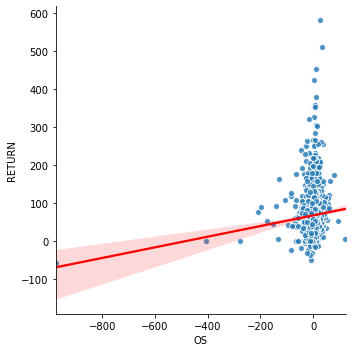

In [709]:
sns.lmplot(x="OS", y="RETURN", data=DF_ROB,robust = True,line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)

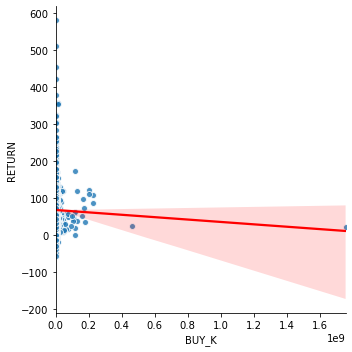

In [710]:
sns.lmplot(x="BUY_K", y="RETURN", data=DF_ROB,robust = True,line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)

**처참하므로 그룹핑을 해본다. BUY_K 기관매수는 0축에 가까워 로그 회귀를 해도 될것 같으나 시간이 없다...**

In [711]:
DF_ROB = DF_ROB.sort_values(by = ['RETURN'],axis=0,ascending = False)
DF_ROB

,RETURN,OS,BUY_K
COMPANY,,,
에프에스티,580.77,26.17,207428
비디아이,511.96,33.14,175053
스페코,454.07,11.22,115278
휴마시스,422.64,3.03,273927
대웅,378.40,9.40,1078493
...,...,...,...
셀바스AI,-30.35,-20.98,241308
세화아이엠씨,-30.70,-6.34,36434
엠벤처투자,-36.34,-13.24,394649


In [712]:
DF_1 = DF_ROB.iloc[:77,:]
DF_2 = DF_ROB.iloc[78:155,:]
DF_3 = DF_ROB.iloc[156:233,:]
DF_4 = DF_ROB.iloc[234:311,:]
DF_5 = DF_ROB.iloc[312:389,:]
DF_6= DF_ROB.iloc[390:467,:]
DF_7= DF_ROB.iloc[468:545,:]
DF_8= DF_ROB.iloc[546:623,:]
DF_9= DF_ROB.iloc[624:701,:]
DF_10= DF_ROB.iloc[702:779,:]
DF_11= DF_ROB.iloc[780:857,:]
DF_12= DF_ROB.iloc[858:935,:]
DF_13= DF_ROB.iloc[936:1013,:]
DF_14= DF_ROB.iloc[1014:1091,:]
DF_15= DF_ROB.iloc[1092:1169,:]
DF_16= DF_ROB.iloc[1170:1247,:]
DF_17= DF_ROB.iloc[1248:1325,:]
DF_18= DF_ROB.iloc[1326:1403,:]
DF_19= DF_ROB.iloc[1404:1481,:]
DF_20= DF_ROB.iloc[1482:,:]


In [713]:
df_group = (DF_1,DF_2,DF_3,DF_4,DF_5,DF_6,DF_7,DF_8,DF_9,DF_10,DF_11,DF_12,DF_13,DF_14,DF_15,DF_16,DF_17,DF_18,DF_19,DF_20)
group=[]
for df in df_group:
    mean_DF_ROB = df.mean()
    data = [[mean_DF_ROB['RETURN'],mean_DF_ROB['OS'],mean_DF_ROB['BUY_K']]]
    df_group_done = pd.DataFrame(data,columns = ['RETURN','OS','BUY_K'])
    group.append(df_group_done)

**그룹화된 데이터를 다시 합치기**

In [714]:
data = group[0]
for i in range(1,20):
    data1=pd.concat([data,group[i]],axis = 0)
    data=data1


In [715]:
DF_ROB = data

In [716]:
DF_ROB

,RETURN,OS,BUY_K
0,238.068961,4.088961,7.349185e+05
0,155.506234,5.235455,2.669388e+06
0,127.045065,4.428442,6.110453e+06
0,111.498182,1.956623,7.721548e+06
0,99.783896,7.062078,3.653669e+06
0,90.858701,-0.744286,1.277261e+06
0,84.511818,5.384545,4.290399e+06
0,77.925714,0.639091,1.099678e+06
0,72.234545,3.583506,3.801486e+06
0,67.129870,2.024935,8.987634e+05


**다시 회귀분석을 실시**

In [717]:
x_data = DF_ROB[['OS','BUY_K']]

In [718]:
target = DF_ROB[['RETURN']]

In [719]:
x_data_con = sm.add_constant(x_data,has_constant = 'add')
multi_model = sm.OLS(target,x_data_con)
fitted_multi_model = multi_model.fit()

In [720]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RETURN   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     2.995
Date:                Sun, 13 Dec 2020   Prob (F-statistic):             0.0769
Time:                        22:56:17   Log-Likelihood:                -104.84
No. Observations:                  20   AIC:                             215.7
Df Residuals:                      17   BIC:                             218.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.8197     14.365      5.974      0.000      55.513     116.126
OS             2.8397      1.420      2.000      0.062      -0.156       5.835
BUY_K      -2.843e-06   1.72e-06     -1.652      0.117   -6.47e-06    7.87e-07
==============================================================================
Omnibus:                       13.108   Durbin-Watson:                   0.670
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.399
Skew:                           1.411   Prob(JB):                      0.00335
Kurtosis:                       5.390   Cond. No.                     1.09e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**BUY_K의 유의확률이 높기 때문에 개별 회귀분석으로 바꿈**

In [721]:
reg = sm.OLS.from_formula("RETURN ~ OS", DF_ROB).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RETURN   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     2.974
Date:                Sun, 13 Dec 2020   Prob (F-statistic):              0.102
Time:                        22:57:38   Log-Likelihood:                -106.33
No. Observations:                  20   AIC:                             216.7
Df Residuals:                      18   BIC:                             218.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.0935     11.794      6.028      0.000      46.316      95.871
OS             2.5430      1.475      1.725      0.102      -0.555       5.641
==============================================================================
Omnibus:                       14.536   Durbin-Watson:                   0.321
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.634
Skew:                           1.495   Prob(JB):                      0.00109
Kurtosis:                       5.724   Cond. No.                         8.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**유의 확률이 높은 OS는 탈락**

**다음은 급락기간의 기관의 매수량**

In [722]:
reg = sm.OLS.from_formula("RETURN ~ BUY_K", DF_ROB).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RETURN   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.706
Date:                Sun, 13 Dec 2020   Prob (F-statistic):              0.208
Time:                        22:58:29   Log-Likelihood:                -106.95
No. Observations:                  20   AIC:                             217.9
Df Residuals:                      18   BIC:                             219.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     87.4442     15.491      5.645      0.000      54.900     119.989
BUY_K      -2.407e-06   1.84e-06     -1.306      0.208   -6.28e-06    1.47e-06
==============================================================================
Omnibus:                       10.315   Durbin-Watson:                   0.345
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                7.836
Skew:                           1.203   Prob(JB):                       0.0199
Kurtosis:                       4.901   Cond. No.                     1.09e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**안타깝게도 DATA_GUIDE에서 가져온 급락기간의 기관의 매수량과 회복 전분기의 자본금 대비 영업이익율은 주가 상승에 유의미한 영향을 끼치지 못하였다**

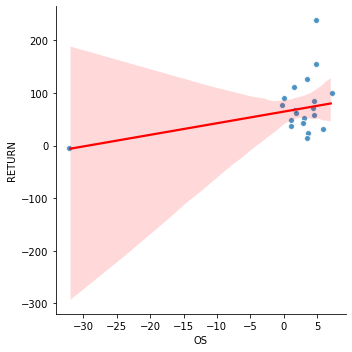

In [723]:
sns.lmplot(x="OS", y="RETURN", data=DF_ROB,robust = True,line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)

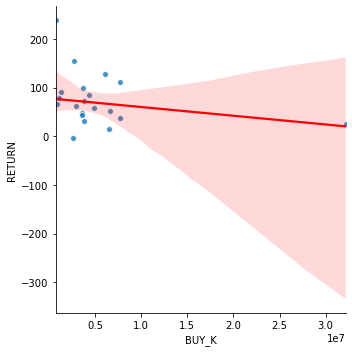

In [724]:
sns.lmplot(x="BUY_K", y="RETURN", data=DF_ROB,robust = True,line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)

**그래프를 보아도 마찬가지**

### 결론: 급락기에는 유보율이 높았던 기업이 덜하락 하였다. 회복기에는 전분기 자본금 대비 영업이익률과 급락기간동안의 기관의 매수량은 주가수익률과 관계가 적었다